In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import random
from sklearn.metrics import r2_score

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional


print(os.getcwd())

/home/jmmcaro/PythonDir/PythonEnv/QoX/code


In [2]:
df_init = pd.read_csv('../csv/S2_Subur.csv', sep=';')
print(df_init.head())
print(list(df_init.columns))

   time  10_validity  10_timeliness  10_recall  10_quantity  10_precision  \
0   500            1              1        1.0     1.000000      0.956138   
1  1000            1              1        1.0     0.888889      0.961171   
2  1500            1              1        1.0     0.882716      0.961171   
3  2000            1              1        1.0     0.913580      0.961171   
4  2500            1              1        1.0     0.876543      0.961171   

   10_detail  10_accuracy    10_QoI  10_ThBps  ...  19_ThBps    19_PDR  \
0          1            1  0.956138  1.000000  ...  1.000000  0.499581   
1          1            1  0.854374  0.827673  ...  0.939626  0.528302   
2          1            1  0.848441  0.820085  ...  0.777333  0.528302   
3          1            1  0.878107  0.825969  ...  1.000000  0.504672   
4          1            1  0.842508  0.787300  ...  0.731784  0.455660   

   19_Jitter  19_GWAv  19_Delay    19_QoE    19_QoD  19_thruthfullness  \
0   1.000000      

In [3]:
cols_GWAv = pd.DataFrame()
cols_Jitter = pd.DataFrame()
cols_Delay = pd.DataFrame()
cols_ThBps = pd.DataFrame()
cols_quantity = pd.DataFrame()
cols_PDR = pd.DataFrame()
cols_recall = pd.DataFrame()
cols_QoE = pd.DataFrame()


cols_GWAv = df_init[['10_GWAv','11_GWAv','12_GWAv','13_GWAv','14_GWAv','15_GWAv','16_GWAv','17_GWAv','18_GWAv','19_GWAv']]
cols_Jitter = df_init[['10_Jitter','11_Jitter','12_Jitter','13_Jitter','14_Jitter','15_Jitter','16_Jitter','17_Jitter','18_Jitter','19_Jitter']]
cols_Delay = df_init[['10_Delay','11_Delay','12_Delay','13_Delay','14_Delay','15_Delay','16_Delay','17_Delay','18_Delay','19_Delay']]
cols_ThBps = df_init[['10_ThBps','11_ThBps','12_ThBps','13_ThBps','14_ThBps','15_ThBps','16_ThBps','17_ThBps','18_ThBps','19_ThBps']]
cols_quantity = df_init[['10_quantity','11_quantity','12_quantity','13_quantity','14_quantity','15_quantity','16_quantity','17_quantity','18_quantity','19_quantity']]
cols_PDR = df_init[['10_PDR','11_PDR','12_PDR','13_PDR','14_PDR','15_PDR','16_PDR','17_PDR','18_PDR','19_PDR']]
cols_recall = df_init[['10_recall','11_recall','12_recall','13_recall','14_recall','15_recall','16_recall','17_recall','18_recall','19_recall']]
cols_QoE = df_init[['10_QoE','11_QoE','12_QoE','13_QoE','14_QoE','15_QoE','16_QoE','17_QoE','18_QoE','19_QoE']]

cols2 = ['GWAv', 'Jitter', 'Delay','ThBps','quantity','PDR','recall','Decision']

df2 = pd.DataFrame(columns=cols2)


In [4]:
aux0 = pd.Series(cols_GWAv['10_GWAv'])
aux1 = pd.Series(cols_GWAv['11_GWAv'])
aux2 = pd.Series(cols_GWAv['12_GWAv'])
aux3 = pd.Series(cols_GWAv['13_GWAv'])
aux4 = pd.Series(cols_GWAv['14_GWAv'])
aux5 = pd.Series(cols_GWAv['15_GWAv'])
aux6 = pd.Series(cols_GWAv['16_GWAv'])
aux7 = pd.Series(cols_GWAv['17_GWAv'])
aux8 = pd.Series(cols_GWAv['18_GWAv'])
aux9 = pd.Series(cols_GWAv['19_GWAv'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['GWAv'] = pd.Series(aux)

[1. 1. 1. ... 1. 1. 1.]


In [5]:
aux0 = pd.Series(cols_Jitter['10_Jitter'])
aux1 = pd.Series(cols_Jitter['11_Jitter'])
aux2 = pd.Series(cols_Jitter['12_Jitter'])
aux3 = pd.Series(cols_Jitter['13_Jitter'])
aux4 = pd.Series(cols_Jitter['14_Jitter'])
aux5 = pd.Series(cols_Jitter['15_Jitter'])
aux6 = pd.Series(cols_Jitter['16_Jitter'])
aux7 = pd.Series(cols_Jitter['17_Jitter'])
aux8 = pd.Series(cols_Jitter['18_Jitter'])
aux9 = pd.Series(cols_Jitter['19_Jitter'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['Jitter'] = pd.Series(aux)

[1.         1.         0.98283889 ... 0.89294216 0.78839421 0.85753849]


In [6]:
aux0 = pd.Series(cols_Delay['10_Delay'])
aux1 = pd.Series(cols_Delay['11_Delay'])
aux2 = pd.Series(cols_Delay['12_Delay'])
aux3 = pd.Series(cols_Delay['13_Delay'])
aux4 = pd.Series(cols_Delay['14_Delay'])
aux5 = pd.Series(cols_Delay['15_Delay'])
aux6 = pd.Series(cols_Delay['16_Delay'])
aux7 = pd.Series(cols_Delay['17_Delay'])
aux8 = pd.Series(cols_Delay['18_Delay'])
aux9 = pd.Series(cols_Delay['19_Delay'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['Delay'] = pd.Series(aux)

[1.         0.92459112 0.91203418 ... 0.84346021 0.74539799 0.81603974]


In [7]:
aux0 = pd.Series(cols_ThBps['10_ThBps'])
aux1 = pd.Series(cols_ThBps['11_ThBps'])
aux2 = pd.Series(cols_ThBps['12_ThBps'])
aux3 = pd.Series(cols_ThBps['13_ThBps'])
aux4 = pd.Series(cols_ThBps['14_ThBps'])
aux5 = pd.Series(cols_ThBps['15_ThBps'])
aux6 = pd.Series(cols_ThBps['16_ThBps'])
aux7 = pd.Series(cols_ThBps['17_ThBps'])
aux8 = pd.Series(cols_ThBps['18_ThBps'])
aux9 = pd.Series(cols_ThBps['19_ThBps'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['ThBps'] = pd.Series(aux)

[1.         0.82767296 0.82008521 ... 0.70969203 0.61902174 0.70869565]


In [8]:
aux0 = pd.Series(cols_quantity['10_quantity'])
aux1 = pd.Series(cols_quantity['11_quantity'])
aux2 = pd.Series(cols_quantity['12_quantity'])
aux3 = pd.Series(cols_quantity['13_quantity'])
aux4 = pd.Series(cols_quantity['14_quantity'])
aux5 = pd.Series(cols_quantity['15_quantity'])
aux6 = pd.Series(cols_quantity['16_quantity'])
aux7 = pd.Series(cols_quantity['17_quantity'])
aux8 = pd.Series(cols_quantity['18_quantity'])
aux9 = pd.Series(cols_quantity['19_quantity'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['quantity'] = pd.Series(aux)

[1.         0.88888889 0.88271605 ... 0.82653061 0.73469388 0.80612245]


In [9]:
aux0 = pd.Series(cols_PDR['10_PDR'])
aux1 = pd.Series(cols_PDR['11_PDR'])
aux2 = pd.Series(cols_PDR['12_PDR'])
aux3 = pd.Series(cols_PDR['13_PDR'])
aux4 = pd.Series(cols_PDR['14_PDR'])
aux5 = pd.Series(cols_PDR['15_PDR'])
aux6 = pd.Series(cols_PDR['16_PDR'])
aux7 = pd.Series(cols_PDR['17_PDR'])
aux8 = pd.Series(cols_PDR['18_PDR'])
aux9 = pd.Series(cols_PDR['19_PDR'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['PDR'] = pd.Series(aux)

[0.77888589 0.78672507 0.78692722 ... 0.50121294 0.43333133 0.481177  ]


In [10]:
aux0 = pd.Series(cols_recall['10_recall'])
aux1 = pd.Series(cols_recall['11_recall'])
aux2 = pd.Series(cols_recall['12_recall'])
aux3 = pd.Series(cols_recall['13_recall'])
aux4 = pd.Series(cols_recall['14_recall'])
aux5 = pd.Series(cols_recall['15_recall'])
aux6 = pd.Series(cols_recall['16_recall'])
aux7 = pd.Series(cols_recall['17_recall'])
aux8 = pd.Series(cols_recall['18_recall'])
aux9 = pd.Series(cols_recall['19_recall'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['recall'] = pd.Series(aux)

[1.   1.   1.   ... 0.68 0.68 0.68]


In [11]:
aux0 = pd.Series(cols_QoE['10_QoE'])
aux1 = pd.Series(cols_QoE['11_QoE'])
aux2 = pd.Series(cols_QoE['12_QoE'])
aux3 = pd.Series(cols_QoE['13_QoE'])
aux4 = pd.Series(cols_QoE['14_QoE'])
aux5 = pd.Series(cols_QoE['15_QoE'])
aux6 = pd.Series(cols_QoE['16_QoE'])
aux7 = pd.Series(cols_QoE['17_QoE'])
aux8 = pd.Series(cols_QoE['18_QoE'])
aux9 = pd.Series(cols_QoE['19_QoE'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['Decision'] = pd.Series(aux)

[0.77888589 0.60204849 0.57847819 ... 0.26790457 0.15763681 0.23863248]


In [12]:
print(df2)

       GWAv    Jitter     Delay     ThBps  quantity       PDR  recall  \
0       1.0  1.000000  1.000000  1.000000  1.000000  0.778886    1.00   
1       1.0  1.000000  0.924591  0.827673  0.888889  0.786725    1.00   
2       1.0  0.982839  0.912034  0.820085  0.882716  0.786927    1.00   
3       1.0  0.957367  0.870445  0.825969  0.913580  0.798338    1.00   
4       1.0  1.000000  0.939549  0.787300  0.876543  0.782637    1.00   
...     ...       ...       ...       ...       ...       ...     ...   
14395   1.0  0.833704  0.738840  0.576902  0.724490  0.433705    0.64   
14396   1.0  0.785765  0.806819  0.669837  0.724490  0.409118    0.68   
14397   1.0  0.892942  0.843460  0.709692  0.826531  0.501213    0.68   
14398   1.0  0.788394  0.745398  0.619022  0.734694  0.433331    0.68   
14399   1.0  0.857538  0.816040  0.708696  0.806122  0.481177    0.68   

       Decision  
0      0.778886  
1      0.602048  
2      0.578478  
3      0.549503  
4      0.578922  
...         ...

[6912, 520, 488, 1535, 3582, 3811, 8279, 9863, 434, 9195]
[2, 1, 5, 4, 4, 3, 2, 9, 2, 10]
-----------------------------
[11438, 6924, 5574, 4552, 2547, 3527, 12509, 5514, 1674, 1519]
[13, 20, 18, 16, 13, 17, 19, 14, 10, 12]
-----------------------------
[13223, 711, 11955, 7527, 8785]
[394, 249, 383, 376, 335]
-----------------------------


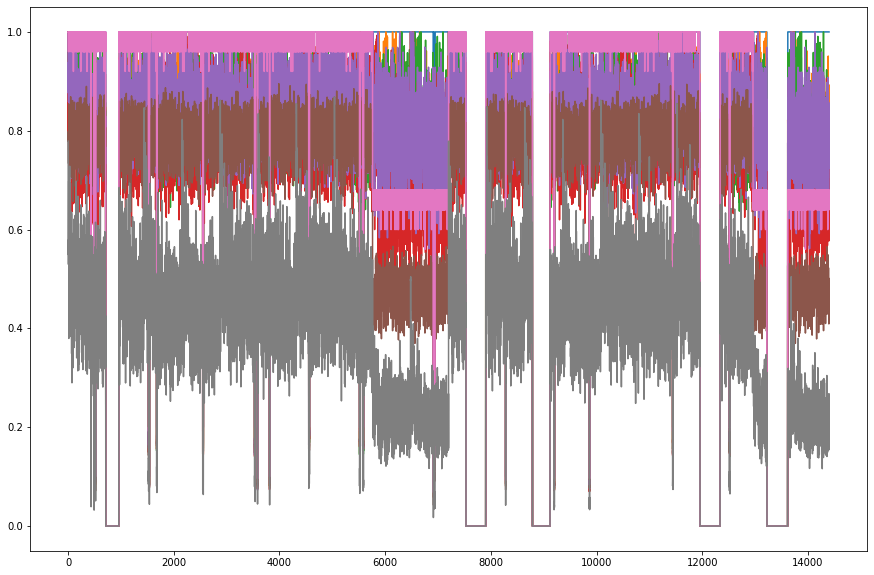

In [13]:
random.seed(42)

lent = df2['GWAv'].shape[0]

leng1 = [random.randint(1,10) for i in range(10)]
init1 = [random.randint(0,lent) for i in range(10)]


print(init1)
print(leng1)
print('-----------------------------')

leng2 = [random.randint(10,20) for i in range(10)]
init2 = [random.randint(0,lent) for i in range(10)]
print(init2)
print(leng2)
print('-----------------------------')


leng3 = [random.randint(200,500) for i in range(5)]
init3 = [random.randint(0,lent) for i in range(5)]
print(init3)
print(leng3)
print('-----------------------------')

for i in range(0,len(leng1)):
    df2[init1[i]:init1[i]+leng1[i]] = df2[init1[i]:init1[i]+leng1[i]] * 0.1;
    #print(df['QoE'][init1[i]:init1[i]+leng1[i]])
    
for i in range(0,len(leng2)):
    df2[init2[i]:init2[i]+leng2[i]] = df2[init2[i]:init2[i]+leng2[i]] * 0.2;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])
    
for i in range(0,len(leng3)):
    df2[init3[i]:init3[i]+leng3[i]] = df2[init3[i]:init3[i]+leng3[i]] * 0;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])

    
fig = plt.figure(figsize=(15,10))
plt.plot(df2)
plt.show()

In [14]:
from chefboost import Chefboost as chef
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score


In [15]:
y_testt = df2['Decision']
for i in range(0,df2.shape[0]):
    if(df2['Decision'][i] >=0.8 and df2['Decision'][i] <=1):
        df2['Decision'][i] = 5
    if(df2['Decision'][i] <0.8 and df2['Decision'][i]>=0.6):
        df2['Decision'][i] = 4   
    if(df2['Decision'][i] <0.6 and df2['Decision'][i]>=0.4):
        df2['Decision'][i] = 3
    if(df2['Decision'][i] <0.4 and df2['Decision'][i]>=0.2):
        df2['Decision'][i] = 2
    if(df2['Decision'][i] <0.2 and df2['Decision'][i]>=0):
        df2['Decision'][i] = 1  
        

In [16]:
print(df2.columns)
df_decision = df2['Decision']
df2 = df2.drop(['Decision'],axis=1)
print(df2)




Index(['GWAv', 'Jitter', 'Delay', 'ThBps', 'quantity', 'PDR', 'recall',
       'Decision'],
      dtype='object')
       GWAv    Jitter     Delay     ThBps  quantity       PDR  recall
0       1.0  1.000000  1.000000  1.000000  1.000000  0.778886    1.00
1       1.0  1.000000  0.924591  0.827673  0.888889  0.786725    1.00
2       1.0  0.982839  0.912034  0.820085  0.882716  0.786927    1.00
3       1.0  0.957367  0.870445  0.825969  0.913580  0.798338    1.00
4       1.0  1.000000  0.939549  0.787300  0.876543  0.782637    1.00
...     ...       ...       ...       ...       ...       ...     ...
14395   1.0  0.833704  0.738840  0.576902  0.724490  0.433705    0.64
14396   1.0  0.785765  0.806819  0.669837  0.724490  0.409118    0.68
14397   1.0  0.892942  0.843460  0.709692  0.826531  0.501213    0.68
14398   1.0  0.788394  0.745398  0.619022  0.734694  0.433331    0.68
14399   1.0  0.857538  0.816040  0.708696  0.806122  0.481177    0.68

[14400 rows x 7 columns]


In [17]:
df2_train, df2_test, dec_train, dec_test = train_test_split(df2, y_testt, test_size=0.25, shuffle=False, random_state=42)


In [18]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf_train = clf.fit(df2_train, dec_train)
dec_test = dec_test.to_numpy();
yhat = clf_train.predict(df2_test)
print(yhat)


[5. 4. 3. ... 2. 1. 2.]


In [19]:
print(len(yhat))
print(len(dec_test))

yhat2 = yhat/max(yhat)
print(yhat2)

comp = {'yhat': yhat, 'y_test': dec_test}
df_comp = pd.DataFrame(data=comp)
print(df_comp)


3600
3600
[1.  0.8 0.6 ... 0.4 0.2 0.4]
      yhat  y_test
0      5.0     5.0
1      4.0     4.0
2      3.0     3.0
3      4.0     4.0
4      4.0     4.0
...    ...     ...
3595   1.0     1.0
3596   1.0     1.0
3597   2.0     2.0
3598   1.0     1.0
3599   2.0     2.0

[3600 rows x 2 columns]


In [20]:
min = 0
count = 0;
notif_paper = []
notif2_paper = []

th = 0.5


for i in range(0,len(yhat)):
    #print([res_QoE['yhat'][i], res_QoE['y_test'][i]])
    if (i==0):
        notif_paper.append(0)
        notif2_paper.append(0)
    else:
        if(yhat[i] < dec_train[i-1]*th):
            notif_paper.append(1)
        else:
            notif_paper.append(0)
        
        if(dec_train[i] < dec_train[i-1]*th or dec_train[i] <=2):
            notif2_paper.append(1)
        else:
            notif2_paper.append(0)    



In [21]:
df_QoI = pd.DataFrame()
df_QoE = pd.DataFrame()
df_QoD = pd.DataFrame()
cols = ['QoE', 'QoI', 'QoD']
df = pd.DataFrame(columns=cols)
print(df)

Empty DataFrame
Columns: [QoE, QoI, QoD]
Index: []


In [22]:
df_QoI = df_init[['10_QoI','11_QoI','12_QoI','13_QoI','14_QoI','15_QoI','16_QoI','17_QoI','18_QoI','19_QoI']]
df_QoE = df_init[['10_QoE','11_QoE','12_QoE','13_QoE','14_QoE','15_QoE','16_QoE','17_QoE','18_QoE','19_QoE']]
df_QoD = df_init[['10_QoD','11_QoD','12_QoD','13_QoD','14_QoD','15_QoD','16_QoD','17_QoD','18_QoD','19_QoD']]

In [23]:
print(df_QoE)

       10_QoE    11_QoE    12_QoE    13_QoE    14_QoE    15_QoE    16_QoE  \
0    0.778886  0.848742  0.846473  0.822911  0.861276  0.834726  0.854852   
1    0.602048  0.831110  0.804822  0.799304  0.662494  0.763185  0.664529   
2    0.578478  0.631114  0.744839  0.790507  0.713565  0.569147  0.745559   
3    0.549503  0.748107  0.671819  0.705248  0.563564  0.695861  0.694311   
4    0.578922  0.696065  0.532870  0.694454  0.353032  0.723459  0.758644   
..        ...       ...       ...       ...       ...       ...       ...   
715  0.394676  0.410843  0.457490  0.388727  0.400892  0.488470  0.484820   
716  0.348549  0.417946  0.329570  0.402812  0.451301  0.444442  0.464041   
717  0.472776  0.676618  0.392138  0.442260  0.514505  0.303678  0.353716   
718  0.477938  0.496654  0.451657  0.471144  0.419232  0.453693  0.336616   
719  0.526536  0.414889  0.413076  0.485323  0.489472  0.524412  0.448913   

       17_QoE    18_QoE    19_QoE  
0    0.868396  0.538994  0.499581  
1  

In [24]:
aux0 = pd.Series(df_QoE['10_QoE'])
aux1 = pd.Series(df_QoE['11_QoE'])
aux2 = pd.Series(df_QoE['12_QoE'])
aux3 = pd.Series(df_QoE['13_QoE'])
aux4 = pd.Series(df_QoE['14_QoE'])
aux5 = pd.Series(df_QoE['15_QoE'])
aux6 = pd.Series(df_QoE['16_QoE'])
aux7 = pd.Series(df_QoE['17_QoE'])
aux8 = pd.Series(df_QoE['18_QoE'])
aux9 = pd.Series(df_QoE['19_QoE'])
aux10 = pd.Series(df_QoE['10_QoE'])
aux11 = pd.Series(df_QoE['11_QoE'])
aux12 = pd.Series(df_QoE['12_QoE'])
aux13 = pd.Series(df_QoE['13_QoE'])
aux14 = pd.Series(df_QoE['14_QoE'])
aux15 = pd.Series(df_QoE['15_QoE'])
aux16 = pd.Series(df_QoE['16_QoE'])
aux17 = pd.Series(df_QoE['17_QoE'])
aux18 = pd.Series(df_QoE['18_QoE'])
aux19 = pd.Series(df_QoE['19_QoE'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux10, aux11, aux12, aux13, aux14, aux15, aux16, aux17, aux18, aux19],axis=0)
aux = np.array(aux)
print(aux)

df['QoE'] = pd.Series(aux)




[0.77888589 0.60204849 0.57847819 ... 0.26790457 0.15763681 0.23863248]


In [25]:
print(df)

            QoE  QoI  QoD
0      0.778886  NaN  NaN
1      0.602048  NaN  NaN
2      0.578478  NaN  NaN
3      0.549503  NaN  NaN
4      0.578922  NaN  NaN
...         ...  ...  ...
14395  0.154120  NaN  NaN
14396  0.173735  NaN  NaN
14397  0.267905  NaN  NaN
14398  0.157637  NaN  NaN
14399  0.238632  NaN  NaN

[14400 rows x 3 columns]


In [26]:
aux0 = pd.Series(df_QoI['10_QoI'])
aux1 = pd.Series(df_QoI['11_QoI'])
aux2 = pd.Series(df_QoI['12_QoI'])
aux3 = pd.Series(df_QoI['13_QoI'])
aux4 = pd.Series(df_QoI['14_QoI'])
aux5 = pd.Series(df_QoI['15_QoI'])
aux6 = pd.Series(df_QoI['16_QoI'])
aux7 = pd.Series(df_QoI['17_QoI'])
aux8 = pd.Series(df_QoI['18_QoI'])
aux9 = pd.Series(df_QoI['19_QoI'])
aux10 = pd.Series(df_QoI['10_QoI'])
aux11 = pd.Series(df_QoI['11_QoI'])
aux12 = pd.Series(df_QoI['12_QoI'])
aux13 = pd.Series(df_QoI['13_QoI'])
aux14 = pd.Series(df_QoI['14_QoI'])
aux15 = pd.Series(df_QoI['15_QoI'])
aux16 = pd.Series(df_QoI['16_QoI'])
aux17 = pd.Series(df_QoI['17_QoI'])
aux18 = pd.Series(df_QoI['18_QoI'])
aux19 = pd.Series(df_QoI['19_QoI'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux10, aux11, aux12, aux13, aux14, aux15, aux16, aux17, aux18, aux19],axis=0)
aux = np.array(aux)
print(aux)

df['QoI'] = pd.Series(aux)


[0.95613796 0.85437421 0.84844106 ... 0.49255457 0.44239523 0.48293473]


In [27]:
print(df)

            QoE       QoI  QoD
0      0.778886  0.956138  NaN
1      0.602048  0.854374  NaN
2      0.578478  0.848441  NaN
3      0.549503  0.878107  NaN
4      0.578922  0.842508  NaN
...         ...       ...  ...
14395  0.154120  0.406349  NaN
14396  0.173735  0.436251  NaN
14397  0.267905  0.492555  NaN
14398  0.157637  0.442395  NaN
14399  0.238632  0.482935  NaN

[14400 rows x 3 columns]


In [28]:
aux0 = pd.Series(df_QoD['10_QoD'])
aux1 = pd.Series(df_QoD['11_QoD'])
aux2 = pd.Series(df_QoD['12_QoD'])
aux3 = pd.Series(df_QoD['13_QoD'])
aux4 = pd.Series(df_QoD['14_QoD'])
aux5 = pd.Series(df_QoD['15_QoD'])
aux6 = pd.Series(df_QoD['16_QoD'])
aux7 = pd.Series(df_QoD['17_QoD'])
aux8 = pd.Series(df_QoD['18_QoD'])
aux9 = pd.Series(df_QoD['19_QoD'])
aux10 = pd.Series(df_QoD['10_QoD'])
aux11 = pd.Series(df_QoD['11_QoD'])
aux12 = pd.Series(df_QoD['12_QoD'])
aux13 = pd.Series(df_QoD['13_QoD'])
aux14 = pd.Series(df_QoD['14_QoD'])
aux15 = pd.Series(df_QoD['15_QoD'])
aux16 = pd.Series(df_QoD['16_QoD'])
aux17 = pd.Series(df_QoD['17_QoD'])
aux18 = pd.Series(df_QoD['18_QoD'])
aux19 = pd.Series(df_QoD['19_QoD'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux10, aux11, aux12, aux13, aux14, aux15, aux16, aux17, aux18, aux19],axis=0)
aux = np.array(aux)
print(aux)

df['QoD'] = pd.Series(aux)


[0.10453818 0.41261574 0.52790728 ... 0.58352385 0.60198045 0.59587436]


In [29]:
print(df)
df_bup = df

            QoE       QoI       QoD
0      0.778886  0.956138  0.104538
1      0.602048  0.854374  0.412616
2      0.578478  0.848441  0.527907
3      0.549503  0.878107  0.543690
4      0.578922  0.842508  0.533646
...         ...       ...       ...
14395  0.154120  0.406349  0.580812
14396  0.173735  0.436251  0.605069
14397  0.267905  0.492555  0.583524
14398  0.157637  0.442395  0.601980
14399  0.238632  0.482935  0.595874

[14400 rows x 3 columns]


In [30]:
var_x = np.linspace(0.0, df.shape[0]-1, num=df.shape[0])
print(var_x)

[0.0000e+00 1.0000e+00 2.0000e+00 ... 1.4397e+04 1.4398e+04 1.4399e+04]


In [31]:
print(os.getcwd())

/home/jmmcaro/PythonDir/PythonEnv/QoX/code


[13146, 527, 497, 1129, 12831, 5244, 10357, 13518, 892, 13814]
[2, 7, 1, 10, 10, 4, 9, 3, 10, 9]
-----------------------------
[2557, 7712, 7628, 13609, 1217, 7529, 12269, 11410, 8919, 10147]
[10, 12, 18, 14, 18, 15, 11, 16, 17, 15]
-----------------------------
[7273, 12754, 11736, 4506, 2511]
[256, 421, 315, 372, 459]
-----------------------------


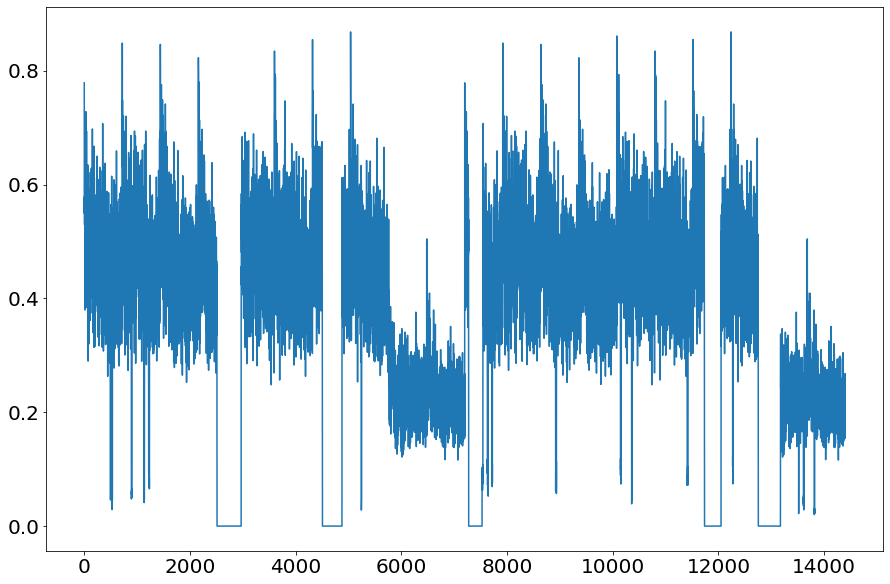

In [32]:
random.seed(46)

lent = df['QoE'].shape[0]

leng1 = [random.randint(1,10) for i in range(10)]
init1 = [random.randint(0,lent) for i in range(10)]


print(init1)
print(leng1)
print('-----------------------------')

leng2 = [random.randint(10,20) for i in range(10)]
init2 = [random.randint(0,lent) for i in range(10)]
print(init2)
print(leng2)
print('-----------------------------')


leng3 = [random.randint(200,500) for i in range(5)]
init3 = [random.randint(0,lent) for i in range(5)]
print(init3)
print(leng3)
print('-----------------------------')

for i in range(0,len(leng1)):
    df['QoE'][init1[i]:init1[i]+leng1[i]] = df['QoE'][init1[i]:init1[i]+leng1[i]] * 0.1;
    #print(df['QoE'][init1[i]:init1[i]+leng1[i]])
    
for i in range(0,len(leng2)):
    df['QoE'][init2[i]:init2[i]+leng2[i]] = df['QoE'][init2[i]:init2[i]+leng2[i]] * 0.2;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])
    
for i in range(0,len(leng3)):
    df['QoE'][init3[i]:init3[i]+leng3[i]] = df['QoE'][init3[i]:init3[i]+leng3[i]] * 0;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])

    
fig = plt.figure(figsize=(15,10))
plt.plot(var_x,df['QoE'])
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

[10128, 1109, 5527, 10538, 4185, 9401, 3395, 366, 12436, 9383]
[9, 1, 8, 9, 5, 9, 7, 4, 2, 6]
-----------------------------
[4041, 3056, 1539, 10074, 3210, 9153, 3583, 7276, 3026, 11690]
[13, 10, 19, 18, 12, 16, 20, 10, 12, 16]
-----------------------------
[11061, 2956, 3114, 2878, 2212]
[397, 264, 232, 309, 468]
-----------------------------


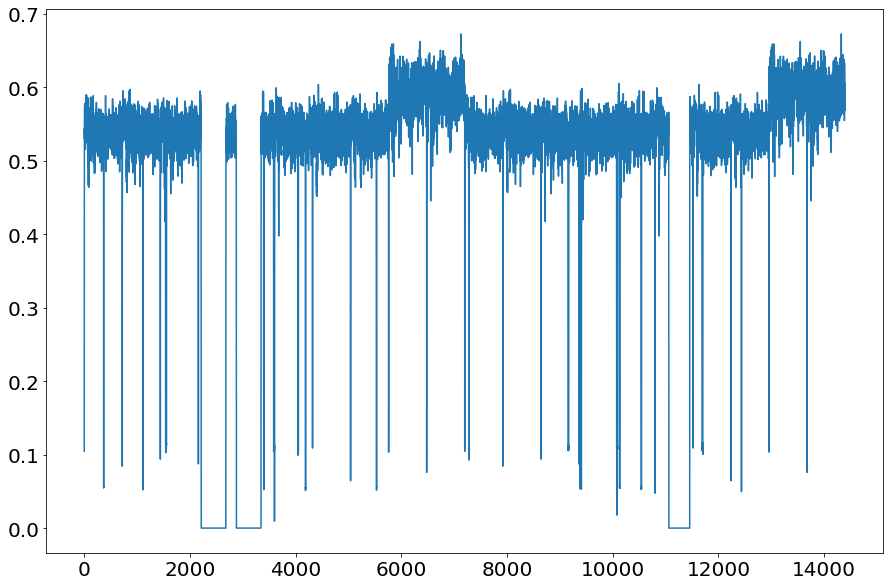

In [33]:
random.seed(56)

lent = df['QoD'].shape[0]

leng1 = [random.randint(1,10) for i in range(10)]
init1 = [random.randint(0,lent) for i in range(10)]


print(init1)
print(leng1)
print('-----------------------------')

leng2 = [random.randint(10,20) for i in range(10)]
init2 = [random.randint(0,lent) for i in range(10)]
print(init2)
print(leng2)
print('-----------------------------')


leng3 = [random.randint(200,500) for i in range(5)]
init3 = [random.randint(0,lent) for i in range(5)]
print(init3)
print(leng3)
print('-----------------------------')

for i in range(0,len(leng1)):
    df['QoD'][init1[i]:init1[i]+leng1[i]] = df['QoD'][init1[i]:init1[i]+leng1[i]] * 0.1;
    #print(df['QoD'][init1[i]:init1[i]+leng1[i]])
    
for i in range(0,len(leng2)):
    df['QoD'][init2[i]:init2[i]+leng2[i]] = df['QoD'][init2[i]:init2[i]+leng2[i]] * 0.2;
    #print(df['QoD'][init2[i]:init2[i]+leng2[i]])
    
for i in range(0,len(leng3)):
    df['QoD'][init3[i]:init3[i]+leng3[i]] = df['QoD'][init3[i]:init3[i]+leng3[i]] * 0;
    #print(df['QoD'][init2[i]:init2[i]+leng2[i]])

    
fig = plt.figure(figsize=(15,10))
plt.plot(var_x,df['QoD'])
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

[3018, 7676, 8561, 2096, 12849, 11731, 1138, 11705, 5953, 11930]
[2, 5, 7, 4, 8, 5, 5, 9, 2, 8]
-----------------------------
[6068, 390, 155, 11632, 3377, 11423, 7668, 10079, 3366, 10955]
[12, 16, 17, 20, 18, 10, 18, 11, 16, 12]
-----------------------------
[1139, 3266, 12406, 5248, 10924]
[363, 447, 356, 303, 349]
-----------------------------


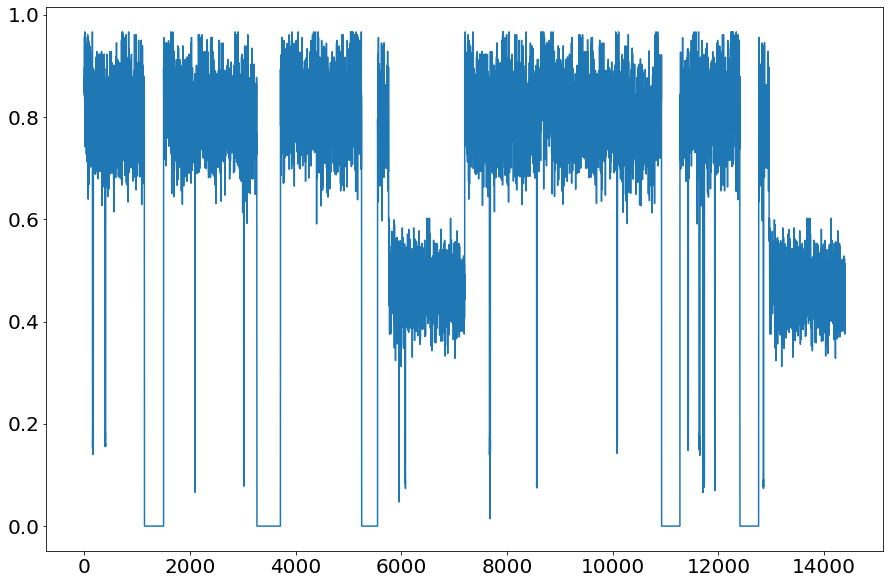

In [34]:
random.seed(66)

lent = df['QoI'].shape[0]

leng1 = [random.randint(1,10) for i in range(10)]
init1 = [random.randint(0,lent) for i in range(10)]


print(init1)
print(leng1)
print('-----------------------------')

leng2 = [random.randint(10,20) for i in range(10)]
init2 = [random.randint(0,lent) for i in range(10)]
print(init2)
print(leng2)
print('-----------------------------')


leng3 = [random.randint(200,500) for i in range(5)]
init3 = [random.randint(0,lent) for i in range(5)]
print(init3)
print(leng3)
print('-----------------------------')

for i in range(0,len(leng1)):
    df['QoI'][init1[i]:init1[i]+leng1[i]] = df['QoI'][init1[i]:init1[i]+leng1[i]] * 0.1;
    #print(df['QoI'][init1[i]:init1[i]+leng1[i]])
    
for i in range(0,len(leng2)):
    df['QoI'][init2[i]:init2[i]+leng2[i]] = df['QoI'][init2[i]:init2[i]+leng2[i]] * 0.2;
    #print(df['QoI'][init2[i]:init2[i]+leng2[i]])
    
for i in range(0,len(leng3)):
    df['QoI'][init3[i]:init3[i]+leng3[i]] = df['QoI'][init3[i]:init3[i]+leng3[i]] * 0;
    #print(df['QoI'][init2[i]:init2[i]+leng2[i]])

    
fig = plt.figure(figsize=(15,10))
plt.plot(var_x,df['QoI'])
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

[12330, 13775, 7179, 8023, 3785, 1362, 5482, 13880, 4946, 3726]
[6, 8, 7, 4, 5, 1, 7, 4, 5, 5]
-----------------------------
[5439, 8883, 7483, 407, 1044, 10871, 10306, 6595, 2490, 1635]
[15, 18, 10, 10, 20, 16, 19, 19, 16, 13]
-----------------------------
[14183, 11962, 8413, 1712, 234]
[325, 244, 352, 495, 253]
-----------------------------


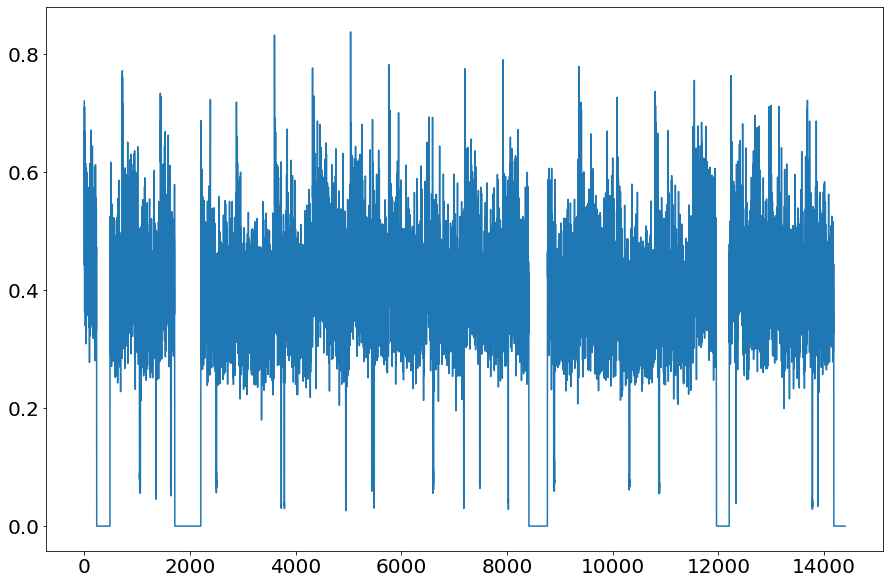

In [35]:
random.seed(76)

df['QC'] = pd.read_csv('../csv/S2_Subur_QC.csv')
lent = df['QC'].shape[0]

leng1 = [random.randint(1,10) for i in range(10)]
init1 = [random.randint(0,lent) for i in range(10)]


print(init1)
print(leng1)
print('-----------------------------')

leng2 = [random.randint(10,20) for i in range(10)]
init2 = [random.randint(0,lent) for i in range(10)]
print(init2)
print(leng2)
print('-----------------------------')


leng3 = [random.randint(200,500) for i in range(5)]
init3 = [random.randint(0,lent) for i in range(5)]
print(init3)
print(leng3)
print('-----------------------------')

for i in range(0,len(leng1)):
    df['QC'][init1[i]:init1[i]+leng1[i]] = df['QC'][init1[i]:init1[i]+leng1[i]] * 0.1;
    #print(df['QoE'][init1[i]:init1[i]+leng1[i]])
    
for i in range(0,len(leng2)):
    df['QC'][init2[i]:init2[i]+leng2[i]] = df['QC'][init2[i]:init2[i]+leng2[i]] * 0.2;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])
    
for i in range(0,len(leng3)):
    df['QC'][init3[i]:init3[i]+leng3[i]] = df['QC'][init3[i]:init3[i]+leng3[i]] * 0;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])

    
fig = plt.figure(figsize=(15,10))
plt.plot(var_x,df['QC'])
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

In [36]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)
 


In [37]:
from sklearn.model_selection import train_test_split

# choose a number of time steps
n_steps = 5
# split into samples
X_QoE, y_QoE = split_sequence(df['QoE'], n_steps)
# summarize the data
#for i in range(len(X)):
#	print(X[i], y[i])
    


In [38]:
n_features = 1
X_QoE = X_QoE.reshape((X_QoE.shape[0], X_QoE.shape[1], n_features))
#print(X_QoE)
# define model
model_QoE = Sequential()
model_QoE.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model_QoE.add(Dense(1))
model_QoE.compile(optimizer='sgd', loss='mean_squared_error')
# split test/train
X_train_QoE, X_test_QoE, y_train_QoE, y_test_QoE = train_test_split(X_QoE, y_QoE, test_size=0.25, shuffle=False, random_state=42)
# fit model
history_QoE = model_QoE.fit(X_train_QoE, y_train_QoE, epochs=150, verbose=1,batch_size=2000*n_steps)
# demonstrate prediction

yhat_QoE = model_QoE.predict(X_test_QoE, verbose=0)
print([yhat_QoE,y_test_QoE])

Epoch 1/150
2/2 [==============================] - 0s 24ms/step - loss: 0.1665
Epoch 2/150
2/2 [==============================] - 0s 27ms/step - loss: 0.1477
Epoch 3/150
2/2 [==============================] - 0s 17ms/step - loss: 0.1314
Epoch 4/150
2/2 [==============================] - 0s 13ms/step - loss: 0.1173
Epoch 5/150
2/2 [==============================] - 0s 20ms/step - loss: 0.1052
Epoch 6/150
2/2 [==============================] - 0s 16ms/step - loss: 0.0946
Epoch 7/150
2/2 [==============================] - 0s 15ms/step - loss: 0.0853
Epoch 8/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0771
Epoch 9/150
2/2 [==============================] - 0s 22ms/step - loss: 0.0700
Epoch 10/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0638
Epoch 11/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0583
Epoch 12/150
2/2 [==============================] - 0s 18ms/step - loss: 0.0536
Epoch 13/150
2/2 [==============================]

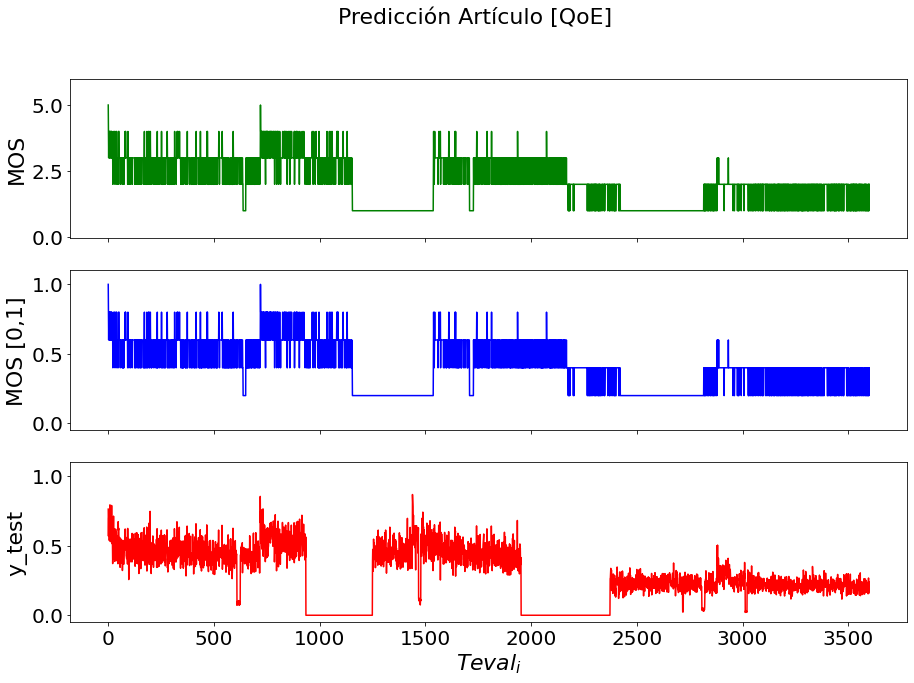

In [39]:
fig2, ((ax1), (ax2), (ax3)) = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=False, figsize=(15,10))
fig2.suptitle('Predicción Artículo [QoE]',fontsize=22)
#fig2.xlabel('$Teval_i$' ,fontsize=22)

ax1.plot(yhat,c='g')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax1.set_ylabel('MOS', fontsize=22)
ax1.set_ylim([-0.05,6])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2.plot(yhat2,c='b')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('MOS [0,1]', fontsize=22,rotation=90)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

ax3.plot(y_test_QoE,c='r')
ax3.set_xlabel('$Teval_i$' ,fontsize=22)
ax3.set_ylabel('y_test', fontsize=22,rotation=90)
ax3.set_ylim([-0.05,1.1])
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Subur-paperEstimationQoE.png', format='png',bbox_inches='tight')

plt.show()

In [40]:
yhat2 = list(yhat2)
yhat2.pop()

0.4

In [41]:
print('R2 Score [QoE paper]: '+str(r2_score(y_test_QoE, yhat2)))

R2 Score [QoE paper]: -0.8310454124191662


dict_keys(['loss'])


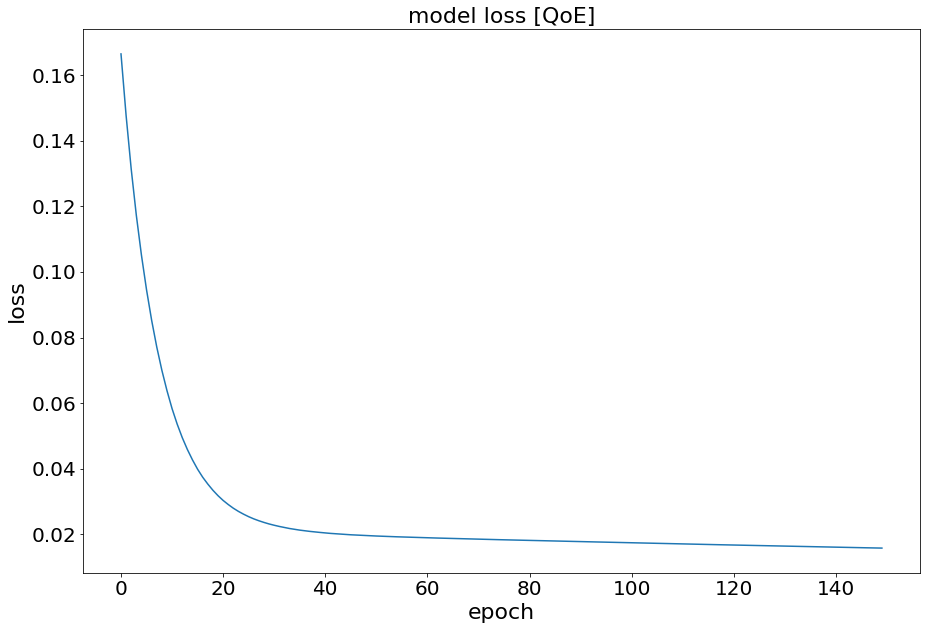

In [42]:
# list all data in history
print(history_QoE.history.keys())
fig = plt.figure(figsize=(15,10))
# summarize history for loss
plt.plot(history_QoE.history['loss'])
plt.title('model loss [QoE]',fontsize=22)
plt.ylabel('loss',fontsize=22)
plt.xlabel('epoch',fontsize=22)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Subur-model_QoE_loss-mse.png', format='png',bbox_inches='tight')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

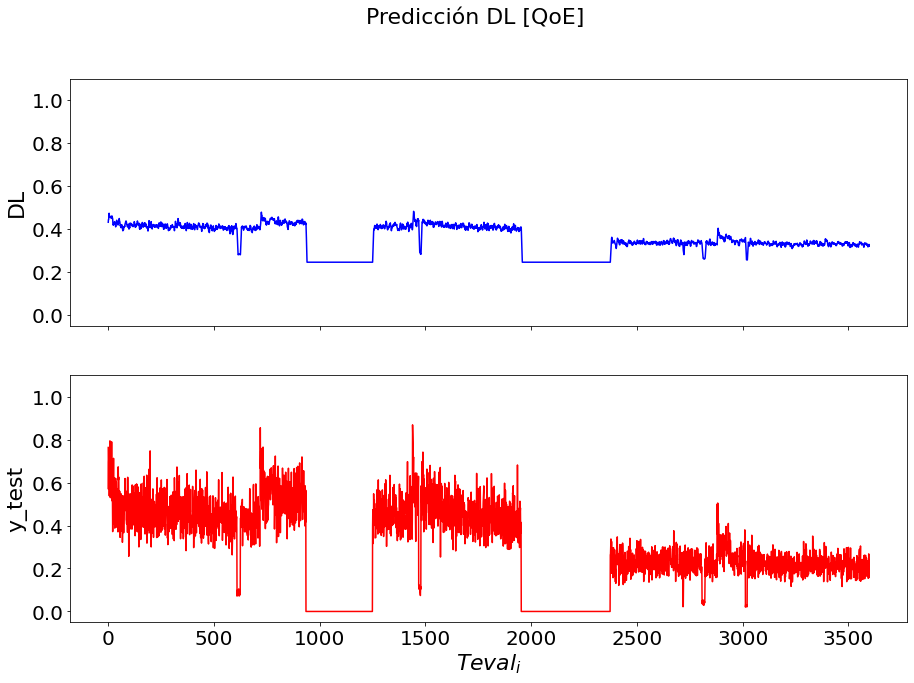

In [43]:
fig2, ((ax2), (ax3)) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(15,10))
fig2.suptitle('Predicción DL [QoE]',fontsize=22)
#fig2.xlabel('$Teval_i$' ,fontsize=22)

ax2.plot(yhat_QoE,c='b')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('DL', fontsize=22,rotation=90)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

ax3.plot(y_test_QoE,c='r')
ax3.set_xlabel('$Teval_i$' ,fontsize=22)
ax3.set_ylabel('y_test', fontsize=22,rotation=90)
ax3.set_ylim([-0.05,1.1])
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Subur-modelEstimationQoE.png', format='png',bbox_inches='tight')

plt.show()

In [44]:
print('R2 Score [QoE]: '+str(r2_score(y_test_QoE, yhat_QoE)))

R2 Score [QoE]: 0.4089475372452862


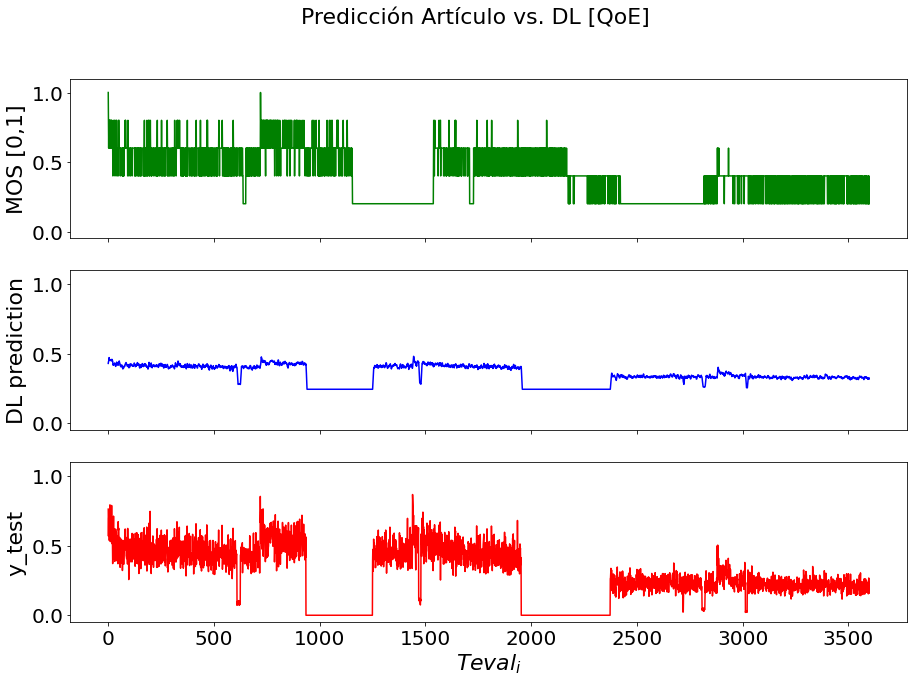

In [45]:
fig2, ((ax1), (ax2), (ax3)) = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=False, figsize=(15,10))
fig2.suptitle('Predicción Artículo vs. DL [QoE]',fontsize=22)
#fig2.xlabel('$Teval_i$' ,fontsize=22)

ax1.plot(yhat2,c='g')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax1.set_ylabel('MOS [0,1]', fontsize=22)
ax1.set_ylim([-0.05,1.1])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2.plot(yhat_QoE,c='b')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('DL prediction', fontsize=22,rotation=90)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

ax3.plot(y_test_QoE,c='r')
ax3.set_xlabel('$Teval_i$' ,fontsize=22)
ax3.set_ylabel('y_test', fontsize=22,rotation=90)
ax3.set_ylim([-0.05,1.1])
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Subur-comparisonPaperDLYtestQoE.png', format='png',bbox_inches='tight')

plt.show()

          yhat    y_test      diff
0     0.431452  0.763185  0.331733
1     0.443855  0.569147  0.125291
2     0.444480  0.695861  0.251381
3     0.459767  0.723459  0.263693
4     0.473295  0.686220  0.212924
...        ...       ...       ...
3594  0.322462  0.154120  0.168342
3595  0.318750  0.173735  0.145015
3596  0.320176  0.267905  0.052271
3597  0.328369  0.157637  0.170733
3598  0.320927  0.238632  0.082294

[3599 rows x 3 columns]


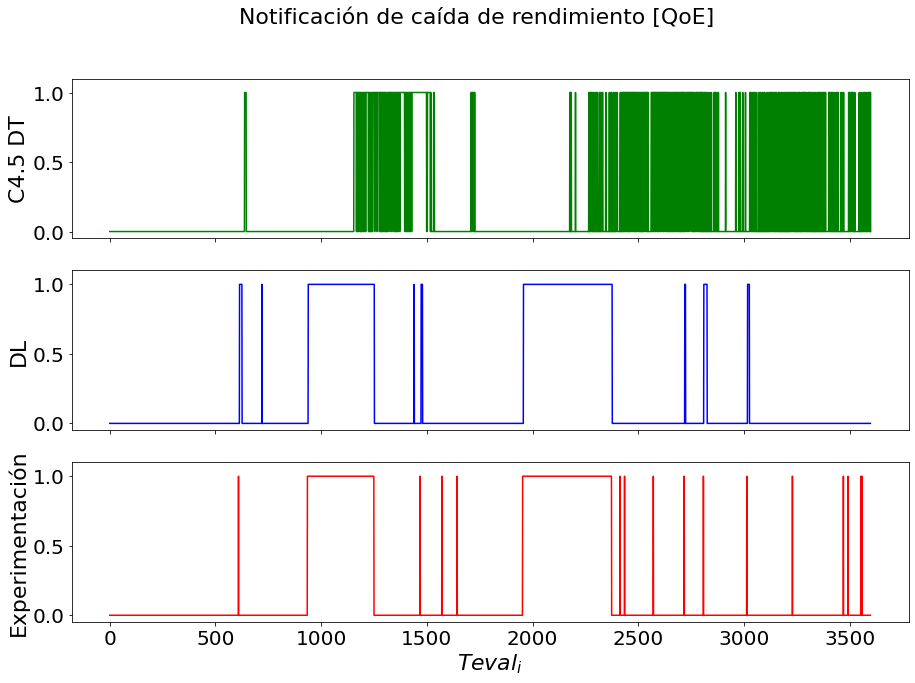

In [46]:
res_QoE = pd.DataFrame()
res_QoE['yhat'] = yhat_QoE.ravel()
res_QoE['y_test'] = y_test_QoE
res_QoE['diff'] = abs(res_QoE['yhat']-res_QoE['y_test'])
#res = np.concatenate((yhat.ravel(),y_test),axis=1)
print(res_QoE)

min = 0
count = 0;
notif = []
notif2 = []

th = 0.5


for i in range(0,res_QoE['yhat'].shape[0]):
    #print([res_QoE['yhat'][i], res_QoE['y_test'][i]])
    if (i==0):
        notif.append(0)
        notif2.append(0)
    else:
        if(res_QoE['yhat'][i] < res_QoE['y_test'][i-1]*th or res_QoE['yhat'][i] == res_QoE['yhat'][i-1] or res_QoE['yhat'][i] <= 0.3):
            notif.append(1)
        else:
            notif.append(0)
        
        if(res_QoE['y_test'][i] < res_QoE['y_test'][i-1]*th or res_QoE['y_test'][i] == res_QoE['y_test'][i-1]):
            notif2.append(1)
        else:
            notif2.append(0)    



x = len(notif)
x = np.linspace(0.0, x-1, num=x)


fig2, ((ax1), (ax2), (ax3)) = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=False, figsize=(15,10))
fig2.suptitle('Notificación de caída de rendimiento [QoE]',fontsize=22)
#fig2.xlabel('$Teval_i$' ,fontsize=22)

ax1.plot(notif_paper,c='g')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax1.set_ylabel('C4.5 DT', fontsize=22)
ax1.set_ylim([-0.05,1.1])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2.plot(x,notif,c='b')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('DL', fontsize=22,rotation=90)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

ax3.plot(x,notif2,c='r')
ax3.set_xlabel('$Teval_i$' ,fontsize=22)
ax3.set_ylabel('Experimentación', fontsize=22,rotation=90)
ax3.set_ylim([-0.05,1.1])
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Subur-NotificationsQoE.png', format='png',bbox_inches='tight')

plt.show()


In [47]:
from sklearn.metrics import confusion_matrix, classification_report
tn, fp, fn, tp = confusion_matrix(notif2, notif).ravel()
print('TN: %i'%tn)
print('FP: %i'%fp)
print('FN: %i'%fn)
print('TP: %i'%tp)
print(classification_report(notif2, notif))

TN: 2793
FP: 55
FN: 23
TP: 728
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2848
           1       0.93      0.97      0.95       751

    accuracy                           0.98      3599
   macro avg       0.96      0.98      0.97      3599
weighted avg       0.98      0.98      0.98      3599



In [48]:


notif_paper2 = notif_paper.pop()



tn, fp, fn, tp = confusion_matrix(notif2, notif_paper).ravel()
print('TN: %i'%tn)
print('FP: %i'%fp)
print('FN: %i'%fn)
print('TP: %i'%tp)
print(classification_report(notif2, notif_paper))

TN: 2164
FP: 684
FN: 653
TP: 98
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      2848
           1       0.13      0.13      0.13       751

    accuracy                           0.63      3599
   macro avg       0.45      0.45      0.45      3599
weighted avg       0.63      0.63      0.63      3599



In [49]:
print('************Diferencias Testing [QoE] **************')
print(max(res_QoE['diff']))
#print(min(res_QoE['diff']))
print(sum(res_QoE['diff'])/len(res_QoE))
print()

************Diferencias Testing [QoE] **************
0.46551454074452203
0.12558327492307012



In [50]:
# choose a number of time steps
n_steps = 5
# split into samples
X_QoI, y_QoI = split_sequence(df['QoI'], n_steps)
# summarize the data
#for i in range(len(X)):
#	print(X[i], y[i])

In [51]:
n_features = 1
X_QoI = X_QoI.reshape((X_QoI.shape[0], X_QoI.shape[1], n_features))
#print(X_QoI)
# define model
model_QoI = Sequential()
model_QoI.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model_QoI.add(Dense(1))
model_QoI.compile(optimizer='sgd', loss='mean_squared_error')
# split test/train
X_train_QoI, X_test_QoI, y_train_QoI, y_test_QoI = train_test_split(X_QoI, y_QoI, test_size=0.25, shuffle=False, random_state=42)
# fit model
history_QoI = model_QoI.fit(X_train_QoI, y_train_QoI, epochs=150, verbose=1,batch_size=2000*n_steps)
# demonstrate prediction

yhat_QoI = model_QoI.predict(X_test_QoI, verbose=0)
print([yhat_QoI,y_test_QoI])

Epoch 1/150
2/2 [==============================] - 0s 23ms/step - loss: 0.4735
Epoch 2/150
2/2 [==============================] - 0s 47ms/step - loss: 0.4107
Epoch 3/150
2/2 [==============================] - 0s 38ms/step - loss: 0.3580
Epoch 4/150
2/2 [==============================] - 0s 31ms/step - loss: 0.3128
Epoch 5/150
2/2 [==============================] - 0s 31ms/step - loss: 0.2739
Epoch 6/150
2/2 [==============================] - 0s 31ms/step - loss: 0.2402
Epoch 7/150
2/2 [==============================] - 0s 25ms/step - loss: 0.2117
Epoch 8/150
2/2 [==============================] - 0s 18ms/step - loss: 0.1872
Epoch 9/150
2/2 [==============================] - 0s 29ms/step - loss: 0.1657
Epoch 10/150
2/2 [==============================] - 0s 23ms/step - loss: 0.1471
Epoch 11/150
2/2 [==============================] - 0s 21ms/step - loss: 0.1310
Epoch 12/150
2/2 [==============================] - 0s 28ms/step - loss: 0.1173
Epoch 13/150
2/2 [==============================]

dict_keys(['loss'])


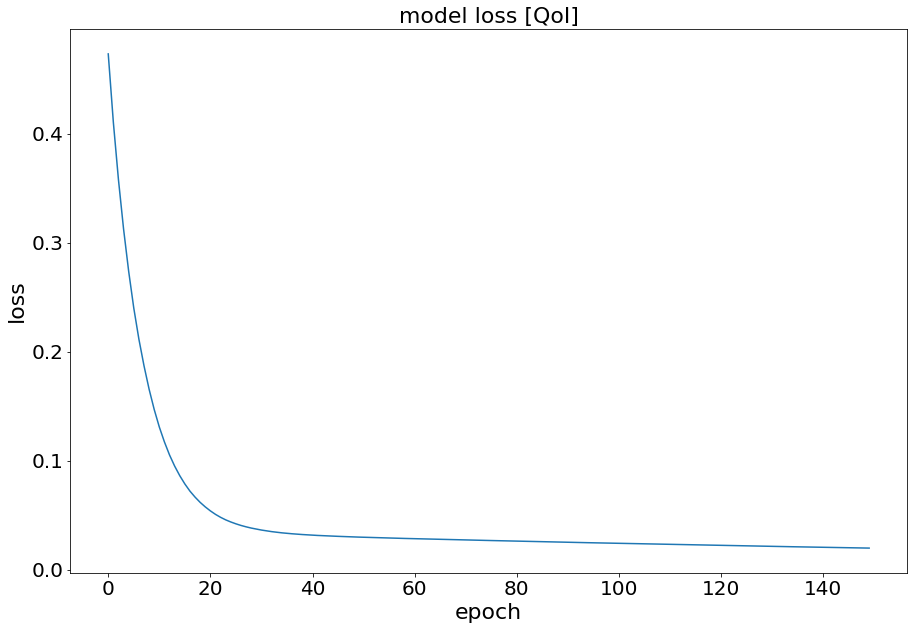

In [52]:
# list all data in history
print(history_QoI.history.keys())
fig = plt.figure(figsize=(15,10))
# summarize history for loss
plt.plot(history_QoI.history['loss'])
plt.title('model loss [QoI]',fontsize=22)
plt.ylabel('loss',fontsize=22)
plt.xlabel('epoch',fontsize=22)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Subur-model_QoI_loss-mse.png', format='png',bbox_inches='tight')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

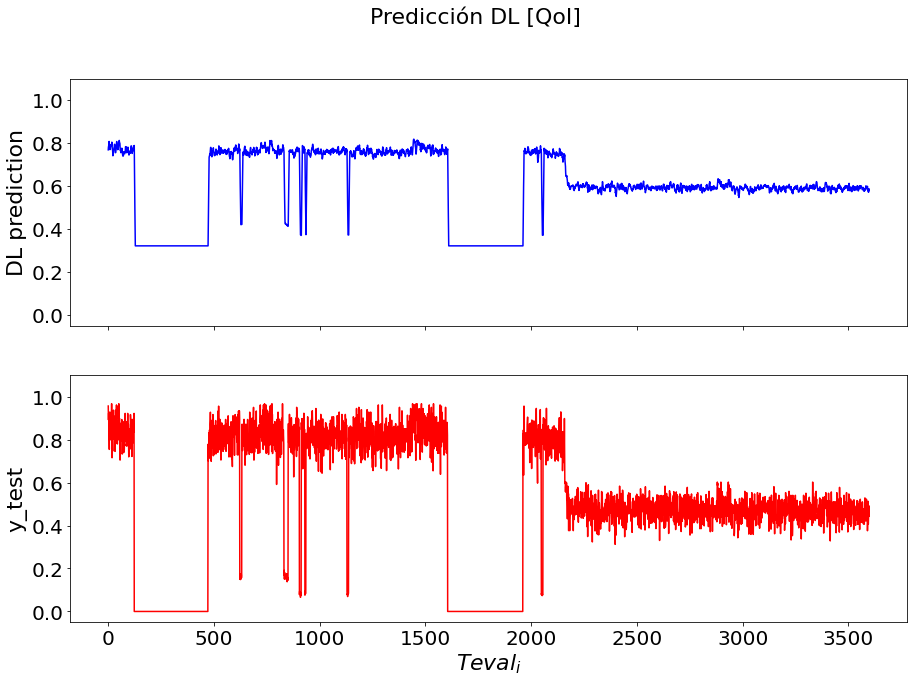

In [53]:
fig2, ( (ax2), (ax3)) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(15,10))
fig2.suptitle('Predicción DL [QoI]',fontsize=22)
#fig2.xlabel('$Teval_i$' ,fontsize=22)

ax2.plot(yhat_QoI,c='b')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('DL prediction', fontsize=22,rotation=90)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

ax3.plot(y_test_QoI,c='r')
ax3.set_xlabel('$Teval_i$' ,fontsize=22)
ax3.set_ylabel('y_test', fontsize=22,rotation=90)
ax3.set_ylim([-0.05,1.1])
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Subur-comparisonPaperDLYtestQoI.png', format='png',bbox_inches='tight')

plt.show()

In [54]:
print('R2 Score [QoI]: '+str(r2_score(y_test_QoI, yhat_QoI)))

R2 Score [QoI]: 0.6352250070993206


          yhat    y_test      diff
0     0.768493  0.956138  0.187645
1     0.782420  0.891613  0.109193
2     0.784970  0.922724  0.137754
3     0.802008  0.860609  0.058601
4     0.807505  0.831136  0.023631
...        ...       ...       ...
3594  0.579367  0.406349  0.173019
3595  0.570911  0.436251  0.134660
3596  0.577432  0.492555  0.084878
3597  0.587240  0.442395  0.144844
3598  0.579689  0.482935  0.096754

[3599 rows x 3 columns]


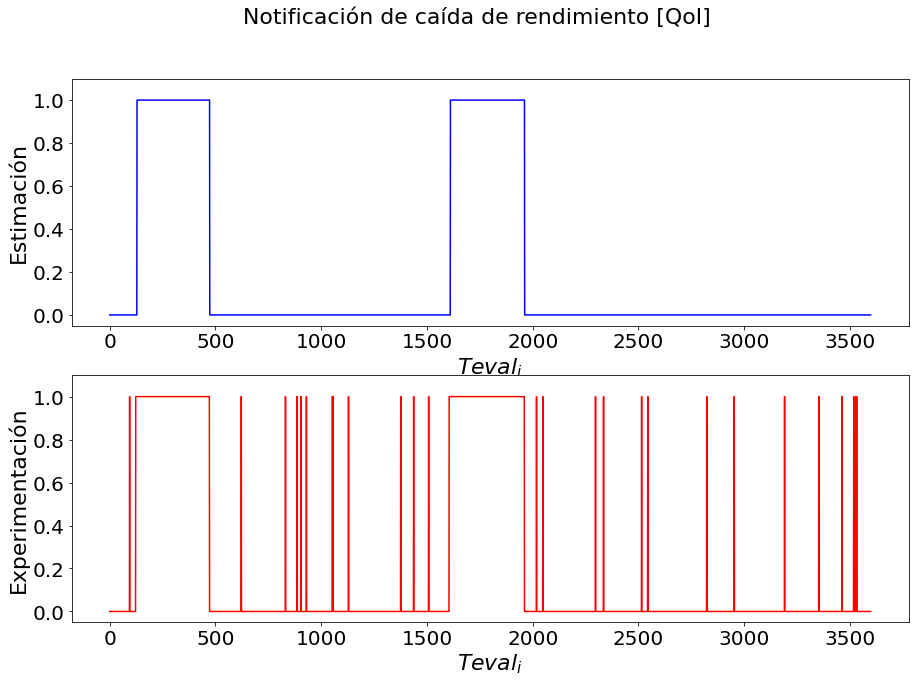

In [55]:
res_QoI = pd.DataFrame()
res_QoI['yhat'] = yhat_QoI.ravel()
res_QoI['y_test'] = y_test_QoI
res_QoI['diff'] = abs(res_QoI['yhat']-res_QoI['y_test'])
#res = np.concatenate((yhat.ravel(),y_test),axis=1)
print(res_QoI)

notif = []
notif2 = []

th = 0.5


for i in range(0,res_QoI['yhat'].shape[0]):
    #print([res_QoI['yhat'][i], res_QoI['y_test'][i]])
    if (i==0):
        notif.append(0)
        notif2.append(0)
    else:
        if(res_QoI['yhat'][i] < res_QoI['y_test'][i-1]*th or res_QoI['yhat'][i] == res_QoI['yhat'][i-1]):
            notif.append(1)
        else:
            notif.append(0)
        
        if(res_QoI['y_test'][i] < res_QoI['y_test'][i-1]*th or res_QoI['y_test'][i] == res_QoI['y_test'][i-1]):
            notif2.append(1)
        else:
            notif2.append(0)    



x = len(notif)
x = np.linspace(0.0, x-1, num=x)


fig2, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(15,10))
fig2.suptitle('Notificación de caída de rendimiento [QoI]',fontsize=22)
ax1.plot(x,notif,c='b')
ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax1.set_ylabel('Estimación', fontsize=22)
ax1.set_ylim([-0.05,1.1])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2.plot(x,notif2,c='r')
ax2.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('Experimentación', fontsize=22)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Subur-NotificationsQoI.png', format='png',bbox_inches='tight')

plt.show()


In [56]:
tn, fp, fn, tp = confusion_matrix(notif2, notif).ravel()
print('TN: %i'%tn)
print('FP: %i'%fp)
print('FN: %i'%fn)
print('TP: %i'%tp)
print(classification_report(notif2, notif))

TN: 2866
FP: 2
FN: 38
TP: 693
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2868
           1       1.00      0.95      0.97       731

    accuracy                           0.99      3599
   macro avg       0.99      0.97      0.98      3599
weighted avg       0.99      0.99      0.99      3599



In [57]:
res_QoI = pd.DataFrame()
res_QoI['yhat'] = yhat_QoI.ravel()
res_QoI['y_test'] = y_test_QoI
res_QoI['diff'] = abs(res_QoI['yhat']-res_QoI['y_test'])
#res = np.concatenate((yhat.ravel(),y_test),axis=1)
print(res_QoI)

          yhat    y_test      diff
0     0.768493  0.956138  0.187645
1     0.782420  0.891613  0.109193
2     0.784970  0.922724  0.137754
3     0.802008  0.860609  0.058601
4     0.807505  0.831136  0.023631
...        ...       ...       ...
3594  0.579367  0.406349  0.173019
3595  0.570911  0.436251  0.134660
3596  0.577432  0.492555  0.084878
3597  0.587240  0.442395  0.144844
3598  0.579689  0.482935  0.096754

[3599 rows x 3 columns]


In [58]:
print('************Diferencias Testing [QoI] **************')
print(max(res_QoI['diff']))
#print(min(res_QoI['diff']))
print(sum(res_QoI['diff'])/len(res_QoI))
print()

************Diferencias Testing [QoI] **************
0.7886277437210083
0.14800511536663907



In [59]:
# choose a number of time steps
n_steps = 5
# split into samples
X_QoD, y_QoD = split_sequence(df['QoD'], n_steps)
# summarize the data
#for i in range(len(X)):
#	print(X_QoD[i], y_QoD[i])

In [60]:
n_features = 1
X_QoD = X_QoD.reshape((X_QoD.shape[0], X_QoD.shape[1], n_features))
#print(X_QoD)
# define model
model_QoD = Sequential()
model_QoD.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model_QoD.add(Dense(1))
model_QoD.compile(optimizer='sgd', loss='mean_squared_error')
# split test/train
X_train_QoD, X_test_QoD, y_train_QoD, y_test_QoD = train_test_split(X_QoD, y_QoD, test_size=0.25, shuffle=False, random_state=42)
# fit model
history_QoD = model_QoD.fit(X_train_QoD, y_train_QoD, epochs=150, verbose=1,batch_size=2000*n_steps)
# demonstrate prediction

yhat_QoD = model_QoD.predict(X_test_QoD, verbose=0)
#print([yhat_QoD,y_test_QoD])


Epoch 1/150
2/2 [==============================] - 0s 22ms/step - loss: 0.2827
Epoch 2/150
2/2 [==============================] - 0s 21ms/step - loss: 0.2475
Epoch 3/150
2/2 [==============================] - 0s 20ms/step - loss: 0.2170
Epoch 4/150
2/2 [==============================] - 0s 20ms/step - loss: 0.1907
Epoch 5/150
2/2 [==============================] - 0s 24ms/step - loss: 0.1679
Epoch 6/150
2/2 [==============================] - 0s 19ms/step - loss: 0.1483
Epoch 7/150
2/2 [==============================] - 0s 20ms/step - loss: 0.1312
Epoch 8/150
2/2 [==============================] - 0s 21ms/step - loss: 0.1167
Epoch 9/150
2/2 [==============================] - 0s 24ms/step - loss: 0.1043
Epoch 10/150
2/2 [==============================] - 0s 18ms/step - loss: 0.0934
Epoch 11/150
2/2 [==============================] - 0s 16ms/step - loss: 0.0840
Epoch 12/150
2/2 [==============================] - 0s 19ms/step - loss: 0.0757
Epoch 13/150
2/2 [==============================]

In [61]:
yhat_QoD = model_QoD.predict(X_test_QoD, verbose=0)
print([yhat_QoD,y_test_QoD])

[array([[0.48289773],
       [0.47946832],
       [0.47793373],
       ...,
       [0.521961  ],
       [0.52246934],
       [0.5243309 ]], dtype=float32), array([0.43118502, 0.54082392, 0.50931572, ..., 0.58352385, 0.60198045,
       0.59587436])]


dict_keys(['loss'])


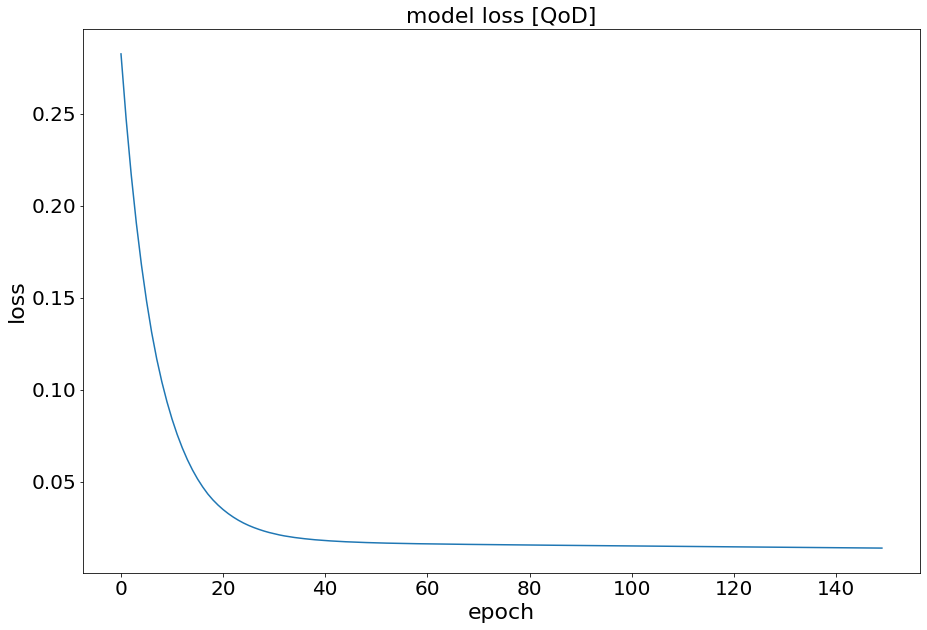

In [62]:
# list all data in history
print(history_QoD.history.keys())
fig = plt.figure(figsize=(15,10))
# summarize history for loss
plt.plot(history_QoD.history['loss'])
plt.title('model loss [QoD]',fontsize=22)
plt.ylabel('loss',fontsize=22)
plt.xlabel('epoch',fontsize=22)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Subur-model_QoD_loss-mean_squared_error.png', format='png',bbox_inches='tight')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

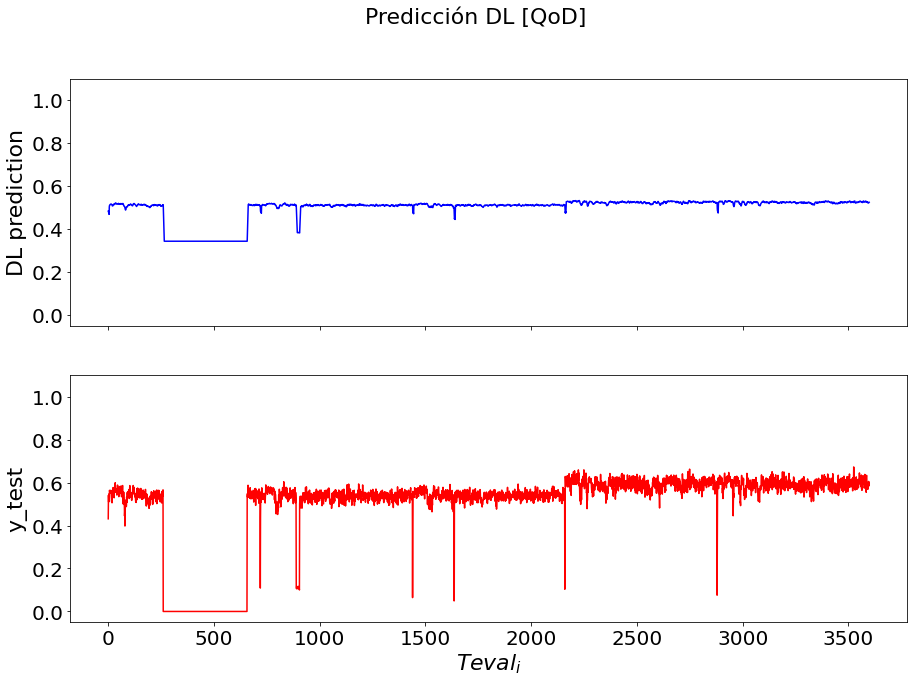

In [63]:
fig2, ((ax2), (ax3)) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(15,10))
fig2.suptitle('Predicción DL [QoD]',fontsize=22)
#fig2.xlabel('$Teval_i$' ,fontsize=22)


ax2.plot(yhat_QoD,c='b')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('DL prediction', fontsize=22,rotation=90)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

ax3.plot(y_test_QoD,c='r')
ax3.set_xlabel('$Teval_i$' ,fontsize=22)
ax3.set_ylabel('y_test', fontsize=22,rotation=90)
ax3.set_ylim([-0.05,1.1])
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Subur-comparisonPaperDLYtestQoD.png', format='png',bbox_inches='tight')

plt.show()

In [64]:
print('R2 Score: '+str(r2_score(y_test_QoD, yhat_QoD)))

R2 Score: 0.5003831102989009


          yhat    y_test      diff
0     0.482898  0.431185  0.051713
1     0.479468  0.540824  0.061356
2     0.477934  0.509316  0.031382
3     0.474587  0.546550  0.071963
4     0.468030  0.542181  0.074151
...        ...       ...       ...
3594  0.520978  0.580812  0.059834
3595  0.520954  0.605069  0.084114
3596  0.521961  0.583524  0.061563
3597  0.522469  0.601980  0.079511
3598  0.524331  0.595874  0.071543

[3599 rows x 3 columns]


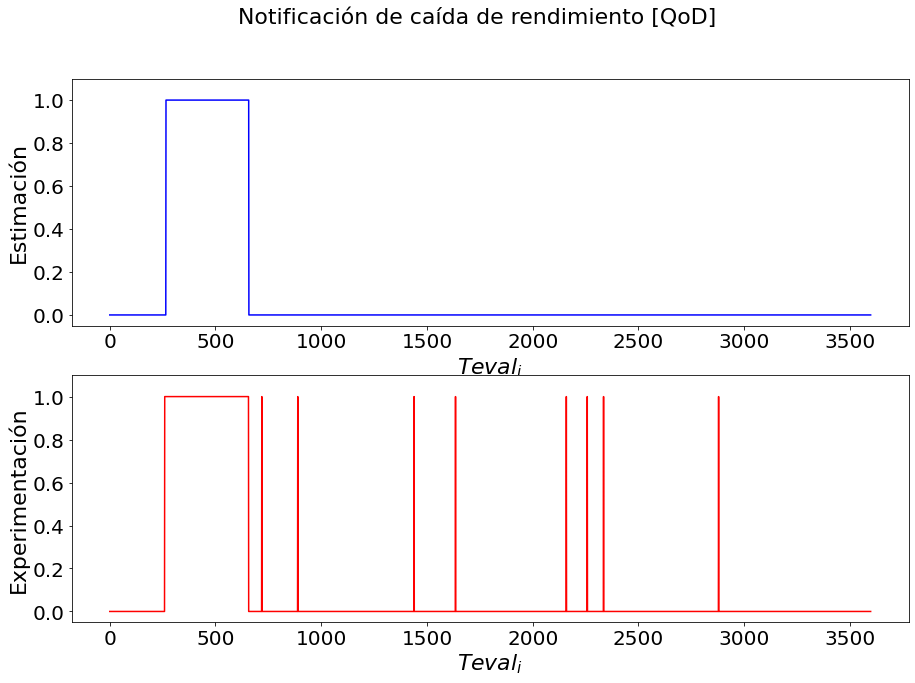

In [65]:
res_QoD = pd.DataFrame()
res_QoD['yhat'] = yhat_QoD.ravel()
res_QoD['y_test'] = y_test_QoD
res_QoD['diff'] = abs(res_QoD['yhat']-res_QoD['y_test'])
#res = np.concatenate((yhat.ravel(),y_test),axis=1)
print(res_QoD)

min = 0
count = 0;
notif = []
notif2 = []

th = 0.5


for i in range(0,res_QoD['yhat'].shape[0]):
    #print([res_QoD['yhat'][i], res_QoD['y_test'][i]])
    if (i==0):
        notif.append(0)
        notif2.append(0)
    else:
        if(res_QoD['yhat'][i] < res_QoD['y_test'][i-1]*th or res_QoD['yhat'][i] == res_QoD['yhat'][i-1]):
            notif.append(1)
        else:
            notif.append(0)
        
        if(res_QoD['y_test'][i] < res_QoD['y_test'][i-1]*th or res_QoD['y_test'][i] == res_QoD['y_test'][i-1]):
            notif2.append(1)
        else:
            notif2.append(0)    



x = len(notif)
x = np.linspace(0.0, x-1, num=x)


fig2, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(15,10))
fig2.suptitle('Notificación de caída de rendimiento [QoD]',fontsize=22)
ax1.plot(x,notif,c='b')
ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax1.set_ylabel('Estimación', fontsize=22)
ax1.set_ylim([-0.05,1.1])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2.plot(x,notif2,c='r')
ax2.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('Experimentación', fontsize=22)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Subur-NotificationsQoD.png', format='png',bbox_inches='tight')

plt.show()

In [66]:
tn, fp, fn, tp = confusion_matrix(notif2, notif).ravel()
print('TN: %i'%tn)
print('FP: %i'%fp)
print('FN: %i'%fn)
print('TP: %i'%tp)
print(classification_report(notif2, notif))

TN: 3193
FP: 1
FN: 14
TP: 391
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3194
           1       1.00      0.97      0.98       405

    accuracy                           1.00      3599
   macro avg       1.00      0.98      0.99      3599
weighted avg       1.00      1.00      1.00      3599



In [67]:
print('************Diferencias Testing [QoD] **************')
print(max(res_QoD['diff']))
#print(min(res_QoD['diff']))
print(sum(res_QoD['diff'])/len(res_QoD))
print()

************Diferencias Testing [QoD] **************
0.5132091641426086
0.08234403516963384



In [68]:
# choose a number of time steps
n_steps = 5
# split into samples
X_QC, y_QC = split_sequence(df['QC'], n_steps)
# summarize the data
#for i in range(len(X)):
#	print(X_QC[i], y_QC[i])

In [69]:
n_features = 1
X_QC = X_QC.reshape((X_QC.shape[0], X_QC.shape[1], n_features))
#print(X_QC)
# define model
model_QC = Sequential()
model_QC.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model_QC.add(Dense(1))
model_QC.compile(optimizer='sgd', loss='mean_squared_error')
# split test/train
X_train_QC, X_test_QC, y_train_QC, y_test_QC = train_test_split(X_QC, y_QC, test_size=0.25, shuffle=False, random_state=42)
# fit model
history_QC = model_QC.fit(X_train_QC, y_train_QC, epochs=150, verbose=1,batch_size=2000*n_steps)
# demonstrate prediction

yhat_QC = model_QC.predict(X_test_QC, verbose=0)
#print([yhat_QC,y_test_QC])


Epoch 1/150
2/2 [==============================] - 0s 30ms/step - loss: 0.1759
Epoch 2/150
2/2 [==============================] - 0s 20ms/step - loss: 0.1561
Epoch 3/150
2/2 [==============================] - 0s 28ms/step - loss: 0.1389
Epoch 4/150
2/2 [==============================] - 0s 20ms/step - loss: 0.1240
Epoch 5/150
2/2 [==============================] - 0s 15ms/step - loss: 0.1108
Epoch 6/150
2/2 [==============================] - 0s 13ms/step - loss: 0.0994
Epoch 7/150
2/2 [==============================] - 0s 18ms/step - loss: 0.0893
Epoch 8/150
2/2 [==============================] - 0s 15ms/step - loss: 0.0804
Epoch 9/150
2/2 [==============================] - 0s 24ms/step - loss: 0.0728
Epoch 10/150
2/2 [==============================] - 0s 25ms/step - loss: 0.0659
Epoch 11/150
2/2 [==============================] - 0s 32ms/step - loss: 0.0600
Epoch 12/150
2/2 [==============================] - 0s 23ms/step - loss: 0.0549
Epoch 13/150
2/2 [==============================]

In [70]:
yhat_QC = model_QC.predict(X_test_QC, verbose=0)
print([yhat_QC,y_test_QC])

[array([[0.37506953],
       [0.38157246],
       [0.39175358],
       ...,
       [0.25467739],
       [0.25467739],
       [0.25467739]], dtype=float32), array([0.69755732, 0.73721462, 0.4919525 , ..., 0.        , 0.        ,
       0.        ])]


dict_keys(['loss'])


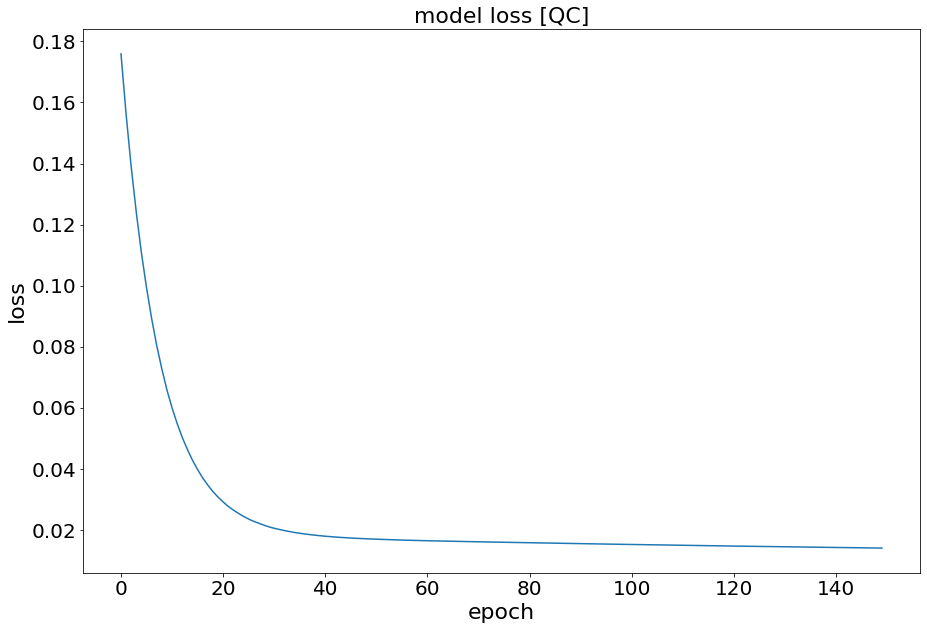

In [71]:
# list all data in history
print(history_QC.history.keys())
fig = plt.figure(figsize=(15,10))
# summarize history for loss
plt.plot(history_QC.history['loss'])
plt.title('model loss [QC]',fontsize=22)
plt.ylabel('loss',fontsize=22)
plt.xlabel('epoch',fontsize=22)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Subur-model_QC_loss-mean_squared_error.png', format='png',bbox_inches='tight')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

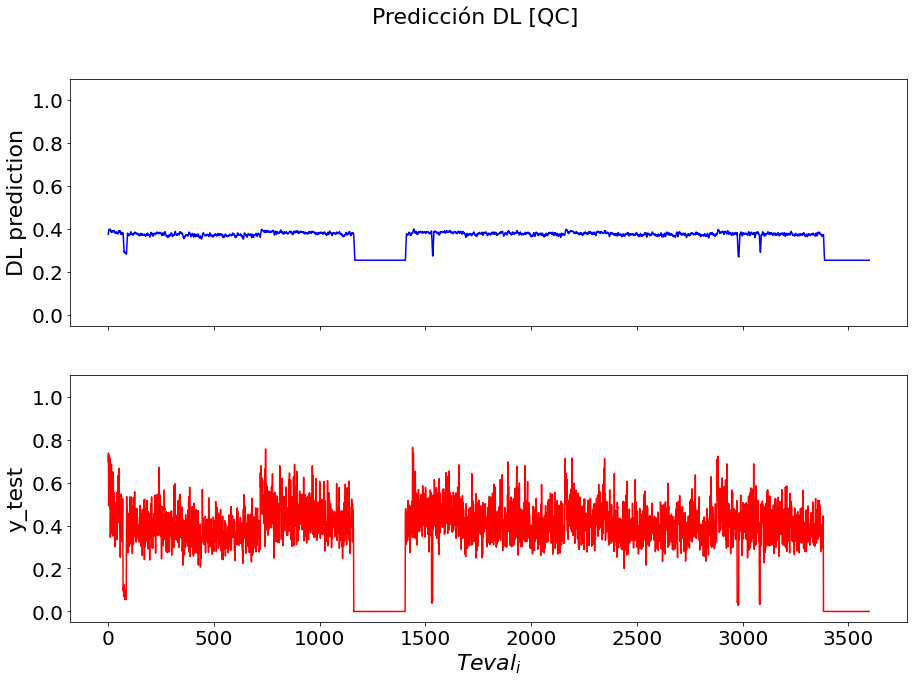

In [72]:
fig2, ( (ax2), (ax3)) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(15,10))
fig2.suptitle('Predicción DL [QC]',fontsize=22)
#fig2.xlabel('$Teval_i$' ,fontsize=22)


ax2.plot(yhat_QC,c='b')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('DL prediction', fontsize=22,rotation=90)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

ax3.plot(y_test_QC,c='r')
ax3.set_xlabel('$Teval_i$' ,fontsize=22)
ax3.set_ylabel('y_test', fontsize=22,rotation=90)
ax3.set_ylim([-0.05,1.1])
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Subur-comparisonPaperDLYtestQC.png', format='png',bbox_inches='tight')

plt.show()

In [73]:
print('R2 Score: '+str(r2_score(y_test_QC, yhat_QC)))

R2 Score: 0.38337145267867245


          yhat    y_test      diff
0     0.375070  0.697557  0.322488
1     0.381572  0.737215  0.355642
2     0.391754  0.491952  0.100199
3     0.394476  0.596702  0.202226
4     0.398702  0.513315  0.114613
...        ...       ...       ...
3594  0.254677  0.000000  0.254677
3595  0.254677  0.000000  0.254677
3596  0.254677  0.000000  0.254677
3597  0.254677  0.000000  0.254677
3598  0.254677  0.000000  0.254677

[3599 rows x 3 columns]


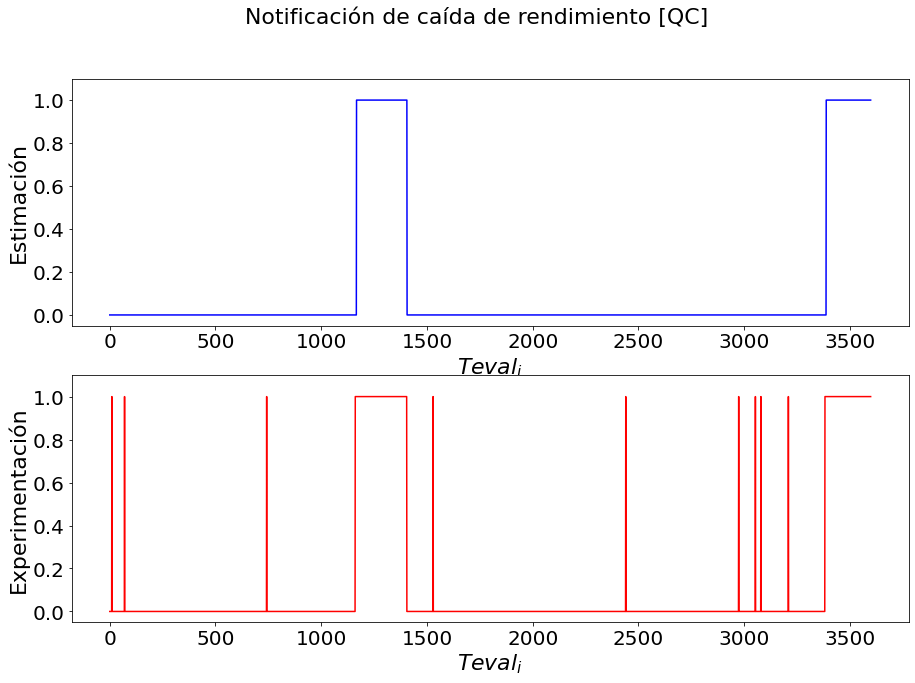

In [74]:
res_QC = pd.DataFrame()
res_QC['yhat'] = yhat_QC.ravel()
res_QC['y_test'] = y_test_QC
res_QC['diff'] = abs(res_QC['yhat']-res_QC['y_test'])
#res = np.concatenate((yhat.ravel(),y_test),axis=1)
print(res_QC)

min = 0
count = 0;
notif = []
notif2 = []

th = 0.5


for i in range(0,res_QC['yhat'].shape[0]):
    #print([res_QC['yhat'][i], res_QC['y_test'][i]])
    if (i==0):
        notif.append(0)
        notif2.append(0)
    else:
        if(res_QC['yhat'][i] < res_QC['y_test'][i-1]*th or res_QC['yhat'][i] == res_QC['yhat'][i-1] ):
            notif.append(1)
        else:
            notif.append(0)
        
        if(res_QC['y_test'][i] < res_QC['y_test'][i-1]*th or res_QC['y_test'][i] == res_QC['y_test'][i-1]):
            notif2.append(1)
        else:
            notif2.append(0)    



x = len(notif)
x = np.linspace(0.0, x-1, num=x)


fig2, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(15,10))
fig2.suptitle('Notificación de caída de rendimiento [QC]',fontsize=22)
ax1.plot(x,notif,c='b')
ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax1.set_ylabel('Estimación', fontsize=22)
ax1.set_ylim([-0.05,1.1])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2.plot(x,notif2,c='r')
ax2.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('Experimentación', fontsize=22)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Subur-NotificationsQC.png', format='png',bbox_inches='tight')

plt.show()

In [75]:
tn, fp, fn, tp = confusion_matrix(notif2, notif).ravel()
print('TN: %i'%tn)
print('FP: %i'%fp)
print('FN: %i'%fn)
print('TP: %i'%tp)
print(classification_report(notif2, notif))

TN: 3128
FP: 1
FN: 21
TP: 449
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3129
           1       1.00      0.96      0.98       470

    accuracy                           0.99      3599
   macro avg       1.00      0.98      0.99      3599
weighted avg       0.99      0.99      0.99      3599

